Student Performance Prediction

In [ ]:
# Import libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # # prepare and split the data
from sklearn.linear_model import LinearRegression # This module will create, test and using our regression model

In [ ]:
# import the csv file
from google.colab import files
uploaded = files.upload()

Saving student-mat.csv to student-mat.csv


In [ ]:
# store the data into a variable
df = pd.read_csv('student-mat.csv', sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


I've changed my separator to semicolon since the default separator for csv files is a comma and my file is separated by semicolons

G1, G2, G3 are the 3 grades that the student gets. The goal is to predict the third and final grade by looking at the other values like first grade, age, sex, and so on

In [10]:
df = df[['age', 'sex', 'studytime', 'absences', 'G1', 'G2', 'G3']]

In [12]:
# convert sex feature to numeric
df['sex'] = df['sex'].map({'M': 0, 'F': 1})
# define the column
prediction = 'G3'

We use the map function which maps a dictionary to our feature. Each M becomes a 0 and every F becomes a 1

PREPARING THE DATA

sklearn models do not accept pandas data frames, but only numpy arrays. That's why we will turn our features into an X-array and our label into a Y-array

In [13]:
X = np.array(df.drop([prediction], 1))
Y = np.array(df[prediction])

np.array converts the selected columns into an array

The drop function returns the data frame without the specified column

X-array will now contain all our columns except for the final grade. The final grade is in the Y-array.

We have to now split the available data inorder to train and test our model

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1)

**TRAINING AND TESTING**


In [16]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
accuracy = model.score(X_test, Y_test)
print(accuracy)

0.8313236514241074


In [18]:
# Enter new data and Predict final grade
X_new = np.array([[18, 1, 3, 40, 15, 16]])
Y_new = model.predict(X_new)
print(Y_new)

[17.27259126]


**VISUALIZING CORRELATIONS**

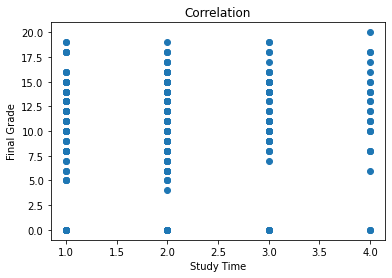

In [20]:
plt.scatter(df['studytime'], df['G3'])
plt.title("Correlation")
plt.xlabel("Study Time")
plt.ylabel("Final Grade")
plt.show()

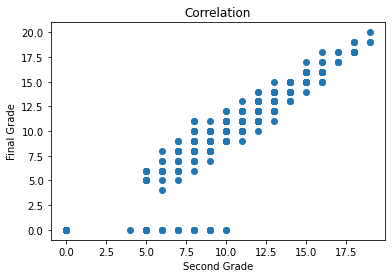

In [21]:
plt.scatter(df['G2'], df['G3'])
plt.title("Correlation")
plt.xlabel("Second Grade")
plt.ylabel("Final Grade")
plt.show()